In [1]:
import pandas as pd
# import askAtRandom
# import Session
# L = Session.Session()
# L.start_session()

In [2]:
# L.students.head()

# Lecture 2: The Nature of Costs

We are interested in how costs respond to business decisions? Why?
- Costs are resources. Business decisions that have costs require resources so see need to make sure we have the resources when required.
- Cost, Volume, Profit analysis. Which we will talk about in the following lectures, is based on the relationship between a key decision: the volume decision, and costs. 

$ Profit = Revenue - Total Cost $

$ Total Cost = Fixed Cost + \sum Cost Per Unit \times \# Units $[<sup>1</sup>](#fn1) 

$ Revenue = \sum Price Per Unit \times \# Units $[<sup>1</sup>](#fn1) 

<span id="fn1"><sup>1: Summed across all products.</sup><span> 

- Apple chooses how many devices to produce based projections of how costs and revenues will respond to this decision.[<sup>2</sup>](#fn2) 

- Today we will focus on modelling the cost portion of this equation.

<span id="fn2"><sup>2: All my examples are Apple. Sorry.</sup><span>


## A simple example where everything is linear:
<center><img src="F2-6.png"  width="1500" height="1500">

### Can you see anything unrealistic in this graph?

In [3]:
# L.ask()

# Let's look at some cost terms in the context of a single-product firm.

- __Fixed cost:__ Cost at zero output. Also used to refer to costs that do not vary with output (or some other driver).
- __Variable cost:__ Cost that vary with output (or some other driver).

- __Marginal cost:__ The cost of the marginal unit (this is the rate of change of cost at the point you calculate it).
- __Incremental cost:__ The cost of producing the next unit. (Often MC and IC have the same value, but they are slightly different things!) 
- __Average cost:__ Total Cost of producing the output over the number of units of output. This is a simple average for single product firms. It is not simple at all for multi-product firms.

- __Cost object:__ An activity or item for which we want to measure cost.
- __Cost driver:__ Any factor or activity whose change leads to a change in costs.

<center><img src="F2-1.png"  width="1500" height="1500">

1. What is the economic significance of the area to the left of the line from X to A?
2. What is the economic significance of the area between X->A and Y->B?
3. What is the economic significance of the area to the right of Y->B?

In [4]:
# L.ask()

<center><img src="F2-2.png"  width="2500" height="2500">

1. If marginal cost is the slope of the tangent line and incremental cost is the cost of one unit, then when are they the same on this graph?
2. When are they different?

In [5]:
# L.ask()

<center><img src="F2-3.png"  width="2500" height="2500">

<center><img src="F2-4.png"  width="2500" height="2500">

# Let's talk about the homework assignment!
- [Download the Excel File here](https://arthurhowardmorris.github.io/resources/semesters/s2023/ACCTG3210.html)
- __Please note that Python, Excel, or any other set of tools can be used on the homework!__

## Cost in a Multiproduct Firm:

Consider three firms that produce two products with quantities denoted $q_1$ and $q_2$. The three distinct cost functions are:
- $C_1(q_1, q_2) = 10q_1 + 5q_2$
- $C_2(q_1, q_2) = 6q_1 + q_1^2 + 8q_2 + q_2^2$
- $C_3(q_1, q_2) = 7q_1 + 9q_2 + q_1q_2$

1. Fill in the following table for each of the cost functions. (Incremental cost refers to the incremental cost of one additional unit of output.)


| Output     | Total Cost | Average Cost | Marginal Cost | Incremental Cost |
|------------|------------|--------------|---------------|------------------|
| $q_1, q_2$ |            | $q_1, q_2$   | $q_1, q_2$    | $q_1, q_2$       |
| 100, 50    |            |              |               |                  |
| 60, 50     |            |              |               |                  |
| 40, 50     |            |              |               |                  |
| 30, 10     |            |              |               |                  |
| 30, 50     |            |              |               |                  |
| 30, 70     |            |              |               |                  |



# Total cost:

- Plug the output data into each cost function!

Let's fill this out using Python (__don't panic__), Excel (also __don't panic__).

We'll start with Excel

## Now Python

First we need to load some data science libraries:

In [6]:
# import pandas so we can put everything into a nice friendly data frame
import pandas as pd 
import numpy as np

In [7]:
# lets put what we know into a dict (python dicts are POWERFUL use them when in doubt)
outputs = {
    "q1" : [100, 60, 40, 30, 30, 30],
    "q2" : [50, 50, 50, 10, 50, 70],
}
outputs

{'q1': [100, 60, 40, 30, 30, 30], 'q2': [50, 50, 50, 10, 50, 70]}

# Table for Firm 1

In [8]:
# use pandas to make that into a dataframe
cost_frame_1 = pd.DataFrame(outputs) 
cost_frame_2 = pd.DataFrame(outputs) 
cost_frame_3 = pd.DataFrame(outputs) 
cost_frame_2

,q1,q2
0,100,50
1,60,50
2,40,50
3,30,10
4,30,50
5,30,70


### Next write down our cost functions as... well... functions

In [9]:
# write down our cost functions
## total cost
def cost_1(q1,q2):
    return 10 * q1 + 5 * q2 
def cost_2(q1,q2):
    return 6 * q1 + q1**2 + 8 * q2 + q2**2 # note that we have to use ** inplace of ^ here
def cost_3(q1,q2):
    return 7 * q1 + 9 * q2 + q1 * q2    

### Then we can use those functions to calculcate average cost

- We can just pass q1,q2 as arguements to the cost functions

In [10]:
cost_1(100,50)

1250

In [11]:
cost_2(100,50)

13500

In [12]:
cost_3(100,50)

6150

Now we need to do this to all the data in the data frames

## slow simple way:

In [13]:
TotalCost1 = []
for q1,q2 in zip(outputs['q1'],outputs['q2']):
    TotalCost1.append(cost_1(q1,q2))
print(TotalCost1)

[1250, 850, 650, 350, 550, 650]


## less simple but faster way

In [14]:
TotalCost1 = [cost_1(q1,q2) for q1,q2 in zip(outputs['q1'],outputs['q2'])]
print(TotalCost1)

[1250, 850, 650, 350, 550, 650]


## super fast way that scales to large datasets

In [15]:
cost_frame_1["Total Cost"] = np.vectorize(cost_1)(cost_frame_1['q1'],cost_frame_1['q2'])
cost_frame_1

,q1,q2,Total Cost
0,100,50,1250
1,60,50,850
2,40,50,650
3,30,10,350
4,30,50,550
5,30,70,650


In [16]:
# we can do this for the other to firms:
cost_frame_2["Total Cost"] = np.vectorize(cost_2)(cost_frame_2['q1'],cost_frame_2['q2'])
cost_frame_3["Total Cost"] = np.vectorize(cost_3)(cost_frame_3['q1'],cost_frame_3['q2'])
cost_frame_2

,q1,q2,Total Cost
0,100,50,13500
1,60,50,6860
2,40,50,4740
3,30,10,1260
4,30,50,3980
5,30,70,6540


# Average cost

The average cost of a each product is the total cost for producing __that product alone__ devided by the number of units produced.

For firm 1 & 2 this is straightforward, each firm has an AC for each project where we plug in zero for the other product:

- $AC_1(q_1) = (10q_1 + 0)/q_1$
- $AC_1(q_2) = (0 + 5q_2)/q_2$
- $AC_2(q_1) = (6q_1 + q_1^2 + 0 + 0)/q1$
- $AC_2(q_2) = (0 + 0 + 8q_2 + q_2^2)/q_2$

Let's do these and then come back to firm 3

## What about firm 3?

$$C_3(q_1, q_2) = 7q_1 + 9q_2 + q_1q_2$$

## What does $q_1\times q_2$ mean?

- when two products are multiplied like this we often refer to it as an "interaction"

In [17]:
# L.ask()

- Calculating the average cost for each product requires us to separate the costs of the products.
- When there are interactions between products their costs are __inseperable__!!
- So "average cost" is no longer a meaningful number! 

One way to think of this is that average cost requires us to pretend that the firm only produces one product. When we can separate costs then this pretend firm tells us something about the real firm. When we cannot separate costs, this pretend firm __does not tell us anything about the real firm__!! 

## One way to do this in python is to write a function 

In [18]:
# avg cost by product
def avg_cost(cost_function,q1=0,q2=0):
    """
    cost_function: the cost function you are averaging
    pass either q1 or q2 but not both to tell which product to use
    """
    if q1!=0 & q2!=0:
        print("only pass one nonzero argument")
        return None
    else:
        return cost_function(q1,q2) / (q1+q2)
    

## Firm 1

In [19]:
# average cost the fast way
cost_frame_1["Average Cost q1"] = np.vectorize(avg_cost)(cost_1,q1=cost_frame_1['q1'])
cost_frame_1["Average Cost q2"] = np.vectorize(avg_cost)(cost_1,q2=cost_frame_1['q2'])
cost_frame_1

,q1,q2,Total Cost,Average Cost q1,Average Cost q2
0,100,50,1250,10.0,5.0
1,60,50,850,10.0,5.0
2,40,50,650,10.0,5.0
3,30,10,350,10.0,5.0
4,30,50,550,10.0,5.0
5,30,70,650,10.0,5.0


## Firm 2

In [20]:
# average cost the fast way
cost_frame_2["Average Cost q1"] = np.vectorize(avg_cost)(cost_2,q1=cost_frame_2['q1'])
cost_frame_2["Average Cost q2"] = np.vectorize(avg_cost)(cost_2,q2=cost_frame_2['q2'])
cost_frame_2

,q1,q2,Total Cost,Average Cost q1,Average Cost q2
0,100,50,13500,106.0,58.0
1,60,50,6860,66.0,58.0
2,40,50,4740,46.0,58.0
3,30,10,1260,36.0,18.0
4,30,50,3980,36.0,58.0
5,30,70,6540,36.0,78.0


# Marginal Cost

The marginal cost is the derivative of the cost function wrt. the product.

$$C_1(q_1, q_2) = 10q_1 + 5q_2$$
$$MC_1(q_1) = 10$$
$$MC_1(q_2) = 5$$

$$C_2(q_1, q_2) = 6q_1 + q_1^2 + 8q_2 + q_2^2$$
$$MC_2(q_1) = 6 + 2q_1$$
$$MC_2(q_2) = 8 + 2q_2$$

$$C_3(q_1, q_2) = 7q_1 + 9q_2 + q_1q_2$$
$$MC_3(q_1) = 7 + q_2$$
$$MC_3(q_2) = 9 + q_1$$

- This might help with the intuition for the average cost in this case!

## Hate Calculus?

_let's make python do the work_

In [21]:
# we'll use symbolic python
import sympy as sp
# we need to tell it which symbols to use
q1,q2 = sp.symbols('q1 q2')

In [22]:
# sympy can take the derivative for us
c1 = "10 * q1 + 5 * q2"
s_mcost_1_q1 = sp.diff(c1 , q1)
s_mcost_1_q2 = sp.diff(c1 , q2)
print(s_mcost_1_q1,s_mcost_1_q2)

10 5


In [23]:
# and we can convert that to a function
mcost_1_q1 = sp.lambdify(q1,s_mcost_1_q1)
mcost_1_q2 = sp.lambdify(q2,s_mcost_1_q2)
mcost_1_q1(100),mcost_1_q2(100)

(10, 5)

# Firm 1

In [24]:
# marginal cost 
cost_frame_1["Marginal Cost q1"] = np.vectorize(mcost_1_q1)(cost_frame_1['q1'])
cost_frame_1["Marginal Cost q2"] = np.vectorize(mcost_1_q2)(cost_frame_1['q2'])
cost_frame_1

,q1,q2,Total Cost,Average Cost q1,Average Cost q2,Marginal Cost q1,Marginal Cost q2
0,100,50,1250,10.0,5.0,10,5
1,60,50,850,10.0,5.0,10,5
2,40,50,650,10.0,5.0,10,5
3,30,10,350,10.0,5.0,10,5
4,30,50,550,10.0,5.0,10,5
5,30,70,650,10.0,5.0,10,5


# Firm 2

In [25]:
q1,q2 = sp.symbols('q1 q2')
# sympy can take the derivative for us
c2 = "6 * q1 + q1**2 + 8 * q2 + q2**2"
s_mcost_2_q1 = sp.diff(c2 , q1)
s_mcost_2_q2 = sp.diff(c2 , q2)
print(s_mcost_2_q1,s_mcost_2_q2)
# and we can convert that to a function
mcost_2_q1 = sp.lambdify(q1,s_mcost_2_q1)
mcost_2_q2 = sp.lambdify(q2,s_mcost_2_q2)
mcost_2_q1(100),mcost_2_q2(50)

2*q1 + 6 2*q2 + 8


(206, 108)

In [26]:
# marginal cost 
cost_frame_2["Marginal Cost q1"] = np.vectorize(mcost_2_q1)(cost_frame_2['q1'])
cost_frame_2["Marginal Cost q2"] = np.vectorize(mcost_2_q2)(cost_frame_2['q2'])
cost_frame_2

,q1,q2,Total Cost,Average Cost q1,Average Cost q2,Marginal Cost q1,Marginal Cost q2
0,100,50,13500,106.0,58.0,206,108
1,60,50,6860,66.0,58.0,126,108
2,40,50,4740,46.0,58.0,86,108
3,30,10,1260,36.0,18.0,66,28
4,30,50,3980,36.0,58.0,66,108
5,30,70,6540,36.0,78.0,66,148


# Firm 3

In [27]:
q1,q2 = sp.symbols('q1 q2')
# sympy can take the derivative for us
c3 = "7*q1 + 9*q2 + q1*q2"
s_mcost_3_q1 = sp.diff(c3 , q1)
s_mcost_3_q2 = sp.diff(c3 , q2)
print(s_mcost_3_q1,s_mcost_3_q2)
# and we can convert that to a function
# note tht we flip the inputs to match the function
mcost_3_q1 = sp.lambdify(q2,s_mcost_3_q1)
mcost_3_q2 = sp.lambdify(q1,s_mcost_3_q2)
mcost_3_q1(50),mcost_3_q2(100)

q2 + 7 q1 + 9


(57, 109)

In [28]:
# marginal cost 
cost_frame_3["Marginal Cost q1"] = np.vectorize(mcost_3_q1)(cost_frame_3['q2'])
cost_frame_3["Marginal Cost q2"] = np.vectorize(mcost_3_q2)(cost_frame_3['q1'])
cost_frame_3

,q1,q2,Total Cost,Marginal Cost q1,Marginal Cost q2
0,100,50,6150,57,109
1,60,50,3870,57,69
2,40,50,2730,57,49
3,30,10,600,17,39
4,30,50,2160,57,39
5,30,70,2940,77,39


# Incremental Cost

$$IC(q_1) = C(q_1+1, q_2) - C(q_1,q_2)$$
$$IC(q_2) = C(q_1, q_2+1) - C(q_1,q_2)$$

Which I find a little easier to write than to say :)

## In python we'll just write a little function for this

In [29]:
# incremental cost if the cost of making the next unit by product
def inc_cost(cost_function,q1=q1,q2=q2,increment=str):
    '''
    cost_function: total cost function that you'd like to increment (over q1,q2)
    q1: the quantity you'd like to pass to the cost func as q1, defaults q1
    q2: same, default q2
    increment: the quantity you'd like to increment
    '''
    C_0 = cost_function(q1,q2)
    if increment == "q1":
        q1=q1+1
    elif increment == "q2":
        q2=q2+1
    else:
        print("increment must be one of q1,q2")
        return None
    C_1 = cost_function(q1,q2)
    return C_1 - C_0

# Firm 1

In [30]:
# Incremental cost
cost_frame_1["Incremental Cost q1"] = np.vectorize(inc_cost)(
                                    cost_1,
                                    cost_frame_1['q1'],
                                    cost_frame_1['q2'],
                                    increment="q1"
                                    )
cost_frame_1["Incremental Cost q2"] = np.vectorize(inc_cost)(
                                    cost_1,
                                    cost_frame_1['q1'],
                                    cost_frame_1['q2'],
                                    increment="q2"
                                    )
cost_frame_1

,q1,q2,Total Cost,Average Cost q1,Average Cost q2,Marginal Cost q1,Marginal Cost q2,Incremental Cost q1,Incremental Cost q2
0,100,50,1250,10.0,5.0,10,5,10,5
1,60,50,850,10.0,5.0,10,5,10,5
2,40,50,650,10.0,5.0,10,5,10,5
3,30,10,350,10.0,5.0,10,5,10,5
4,30,50,550,10.0,5.0,10,5,10,5
5,30,70,650,10.0,5.0,10,5,10,5


# Firm 2

In [31]:
# Incremental cost
cost_frame_2["Incremental Cost q1"] = np.vectorize(inc_cost)(
                                    cost_2,
                                    cost_frame_2['q1'],
                                    cost_frame_2['q2'],
                                    increment="q1"
                                    )
cost_frame_2["Incremental Cost q2"] = np.vectorize(inc_cost)(
                                    cost_2,
                                    cost_frame_2['q1'],
                                    cost_frame_2['q2'],
                                    increment="q2"
                                    )
cost_frame_2

,q1,q2,Total Cost,Average Cost q1,Average Cost q2,Marginal Cost q1,Marginal Cost q2,Incremental Cost q1,Incremental Cost q2
0,100,50,13500,106.0,58.0,206,108,207,109
1,60,50,6860,66.0,58.0,126,108,127,109
2,40,50,4740,46.0,58.0,86,108,87,109
3,30,10,1260,36.0,18.0,66,28,67,29
4,30,50,3980,36.0,58.0,66,108,67,109
5,30,70,6540,36.0,78.0,66,148,67,149


# Firm 3

In [32]:
# Incremental cost
cost_frame_3["Incremental Cost q1"] = np.vectorize(inc_cost)(
                                    cost_3,
                                    cost_frame_3['q1'],
                                    cost_frame_3['q2'],
                                    increment="q1"
                                    )
cost_frame_3["Incremental Cost q2"] = np.vectorize(inc_cost)(
                                    cost_3,
                                    cost_frame_3['q1'],
                                    cost_frame_3['q2'],
                                    increment="q2"
                                    )
cost_frame_3

,q1,q2,Total Cost,Marginal Cost q1,Marginal Cost q2,Incremental Cost q1,Incremental Cost q2
0,100,50,6150,57,109,57,109
1,60,50,3870,57,69,57,69
2,40,50,2730,57,49,57,49
3,30,10,600,17,39,17,39
4,30,50,2160,57,39,57,39
5,30,70,2940,77,39,77,39


## Let's make a 3d graph in Python!!!

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np # we already have np 

In [34]:
# Create data for the plot
q1 = np.linspace(0, 1_000, 1_000)
q2 = np.linspace(0, 1_000, 1_000)
Q1, Q2 = np.meshgrid(q1, q2)
# calc costs
C1 = 10 * Q1 + 5 * Q2 
C2 = 6 * Q1 + Q1**2 + 8 * Q2 + Q2**2
C3 = 7 * Q1 + 9 * Q2 + Q1 * Q2    

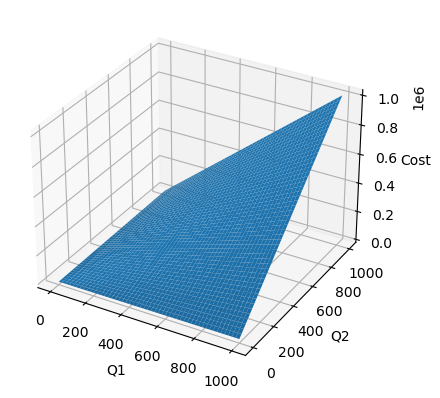

In [37]:
# Create the figure and add a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.plot_surface(Q1, Q2, C1)
# ax.plot_surface(Q1, Q2, C2)
ax.plot_surface(Q1, Q2, C3)

# Set axis labels and show the plot
ax.set_xlabel('Q1')
ax.set_ylabel('Q2')
ax.set_zlabel('Cost')
plt.show()


<center><img src="F2-5.png"  width="2500" height="2500">

In [38]:
# L.end_session()